# Lasso from Scratch

In this model we will explore the use of lasso linear regression, first with the sklearn environment on a derived data set. Then we will create the lasso algorithm from scratch and explore our algorithm, the model, and the parameters.

The theory and method can be found in the pdf file titled "Linear Regression."

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import random
import math
%matplotlib inline

## The Data
We will generate a random set of x values. The y values will be sin(4x), with some noise added to it.

In [60]:
#Create a random set of n x-values in the range [0,1)
random.seed(98103)
n=30
x=[random.random() for i in range(n)]

In [61]:
x.sort()
xseries=pd.Series(x)

In [62]:
#Create y values
yseries=xseries.apply(lambda x: math.sin(4*x))

In [63]:
#Add some random Guasian noise to the data
random.seed(1)
noise=pd.Series([random.gauss(0,1.0/3.0) for i in range(n)])
yseries=yseries+noise

In [64]:
def rss(ytrue,ypredict):
    return ((ytrue-ypredict)**2).sum()

In [65]:
#Let's create a test set
random.seed(384)
xtest=[random.random() for i in range(n)]

In [66]:
xtest.sort()
xtest=pd.Series(xtest)
ytest=xtest.apply(lambda x: math.sin(4*x))

In [67]:
#Add some random Guasian noise to the data
random.seed(797)
noise2=pd.Series([random.gauss(0,1.0/3.0) for i in range(n)])
ytest=ytest+noise

## Plot the Data

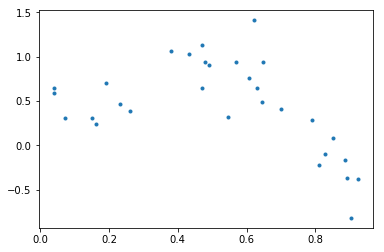

In [68]:
plt.plot(xseries,yseries,".")

## Our Models

In [172]:
#Define a function that takes an array feature and a maximal degree, then returns a data frame with the original feature as
#the first column, then each subsequent column is the data of the first raised to increasing integer powers, up to the
#maximal degree
def polynomial_df(series,maxdegree):
    poly_df=pd.DataFrame({"x":series})
    orderlist=["x"]
    for degree in range(2,maxdegree+1):
        poly_df["x^"+str(degree)]=series**degree
        orderlist.append("x^"+str(degree))
    return poly_df[orderlist]

### Ordinary Least Squares (OLS)

In [173]:
#Create our x-values data frame with polynomial features up to degree 15
X_poly15=polynomial_df(xseries,15)

In [174]:
X_poly15.head()

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,0.039579,0.001566,0.000062,0.000002,9.712277e-08,3.844017e-09,1.521421e-10,6.021625e-12,2.383296e-13,9.432833e-15,3.733416e-16,1.477647e-17,5.848369e-19,2.314723e-20,9.161429e-22
1,0.041568,0.001728,0.000072,0.000003,1.241083e-07,5.158947e-09,2.144476e-10,8.914179e-12,3.705455e-13,1.540287e-14,6.402681e-16,2.661473e-17,1.106324e-18,4.598777e-20,1.911624e-21
2,0.072432,0.005246,0.000380,0.000028,1.993659e-06,1.444046e-07,1.045951e-08,7.576024e-10,5.487462e-11,3.974675e-12,2.878935e-13,2.085269e-14,1.510401e-15,1.094013e-16,7.924146e-18
3,0.150289,0.022587,0.003395,0.000510,7.667197e-05,1.152296e-05,1.731774e-06,2.602667e-07,3.911523e-08,5.878591e-09,8.834878e-10,1.327785e-10,1.995516e-11,2.999042e-12,4.507231e-13
4,0.161334,0.026029,0.004199,0.000677,1.093028e-04,1.763428e-05,2.845012e-06,4.589975e-07,7.405197e-08,1.194711e-08,1.927477e-09,3.109678e-10,5.016973e-11,8.094091e-12,1.305853e-12


In [175]:
olr=LinearRegression().fit(X_poly15,yseries)

In [176]:
olr.coef_

array([  1.68855017e+03,  -5.21795543e+04,   9.06187315e+05,
        -1.01385803e+07,   7.81815884e+07,  -4.30158915e+08,
         1.72002969e+09,  -5.04552140e+09,   1.08860248e+10,
        -1.71957853e+10,   1.96084214e+10,  -1.56882427e+10,
         8.34643053e+09,  -2.64973280e+09,   3.79636460e+08])

We see that the higher order terms have large coefficients, on the order of e10

In [177]:
y_predict_olr=olr.predict(X_poly15)

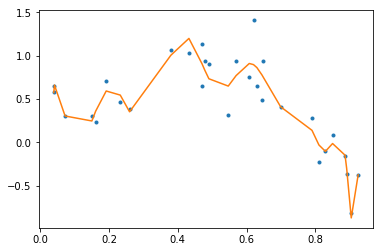

In [178]:
plt.plot(xseries,yseries,".",xseries,y_predict_olr,"-")

Overfit indeed! Let's see how this overfit model performs on a test set

In [179]:
X_poly15test=polynomial_df(xtest,15)
y_predict_test=olr.predict(X_poly15test)

(-2, 2)

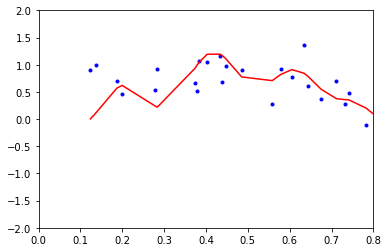

In [180]:
plt.figure()
plt.plot(xtest,ytest,".",color="blue")
plt.plot(xtest,y_predict_test,"-",color="red")
plt.xlim(0,.8)
plt.ylim(-2,2)

It doesn't look like a great fit. This notion is reinforced when we look at the largest x values...

(-2, 100)

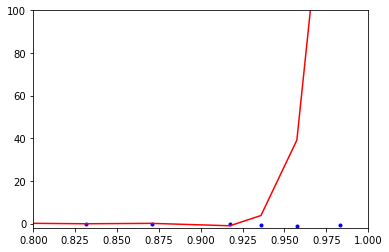

In [181]:
plt.figure()
plt.plot(xtest,ytest,".",color="blue")
plt.plot(xtest,y_predict_test,"-",color="red")
plt.xlim(0.8,1)
plt.ylim(-2,100)

In [182]:
print("RSS Train: {}\nRSS Test {}".format(rss(yseries,y_predict_olr),rss(ytest,y_predict_test)))

RSS Train: 0.8899916717552098
RSS Test 56004.5712077273


That's about as overfit as you can get!!

We see that the tail end shoots off to infinity. Is it the tail that is contributing to the high rss value? What is the rss for the more reasonable interval plotted above?

In [183]:
print("Train: {}\nTest: {}".format(rss(yseries[:24],olr.predict(X_poly15.iloc[:24])),
                                   rss(ytest[:24],olr.predict(X_poly15test.iloc[:24]))))
                                   

Train: 0.873222030314539
Test: 3.605443396298777


The error is much smaller on this "better fitting" portion but we still see that it is quite a bit higher than the test set.
We still can conclude that on even on this "better fitting" portion, the model is still overfit.

### Lasso Regression

Let's take a look at lasso regression to see if it helps us avoid overfitting and see if it can reduce our features

In [184]:
alphas1=[.001,.005,.01,.05,.1]

In [185]:
model_list1=[]
for alpha in alphas1:
    model=Lasso(alpha=alpha).fit(X_poly15,yseries)
    model_list1.append(model)

In [186]:
#Let's look at the coefficients
for model in model_list1:
    print("\nIntercept: {}".format(model.intercept_))
    print("Coefficients: {}".format(model.coef_))


Intercept: 0.3353914440440979
Coefficients: [ 1.37300157  0.         -0.         -2.88580818 -0.18099104 -0.         -0.
 -0.         -0.          0.          0.          0.          0.          0.
  0.        ]

Intercept: 0.49353912522465726
Coefficients: [ 0.69397648  0.         -0.         -0.         -2.53762454 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]

Intercept: 0.627979703688736
Coefficients: [ 0.26183637  0.         -0.         -0.         -1.96011288 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]

Intercept: 0.6002703896514232
Coefficients: [-0.         -0.         -0.         -0.74252833 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
 -0.        ]

Intercept: 0.4526915093969324
Coefficients: [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


We notice that not only are the coefficients subdued, a lot are zero. The greater the alpha value, the fewer non zero terms we have. Let us plot these models, to see how they fit the data

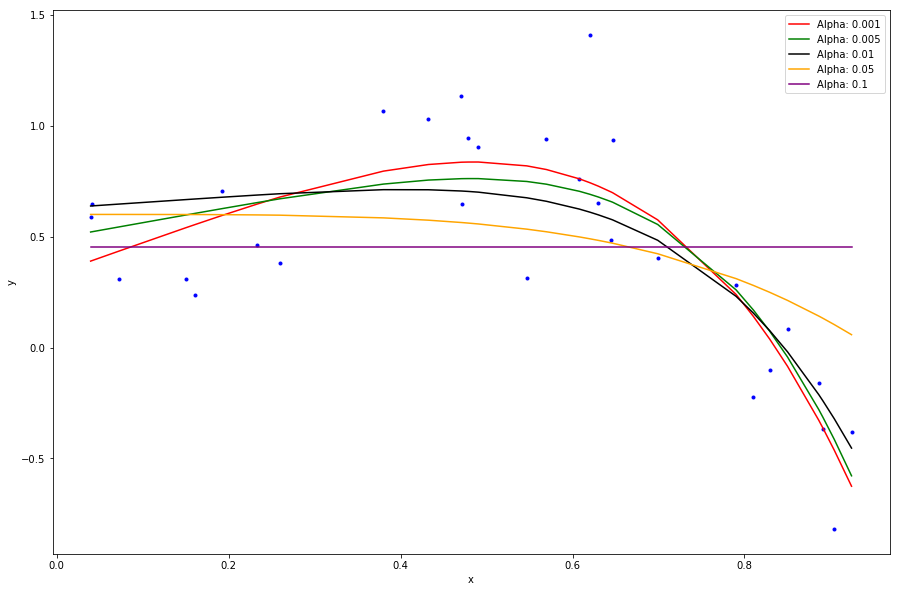

In [187]:
plt.figure(figsize=(15,10))
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,model_list1[0].predict(X_poly15),"-",color="red",label="Alpha: 0.001")
plt.plot(xseries,model_list1[1].predict(X_poly15),"-",color="green",label="Alpha: 0.005")
plt.plot(xseries,model_list1[2].predict(X_poly15),"-",color="black",label="Alpha: 0.01")
plt.plot(xseries,model_list1[3].predict(X_poly15),"-",color="orange",label="Alpha: 0.05")
plt.plot(xseries,model_list1[4].predict(X_poly15),"-",color="purple",label="Alpha: 0.1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

The smallest value of alpha looks like a good fit. It does not appear to be overfit and it has the advantage of having few features. Let's take a look at the error

In [188]:
print("Train RSS: {}\nTest RSS: {}".format(rss(yseries,model_list1[0].predict(X_poly15)),
                                          rss(ytest,model_list1[0].predict(X_poly15test))))

Train RSS: 1.9185209995315236
Test RSS: 2.4595718947621728


This is a much better test score. The train score is lower, but for the purpose of prediction, the test score is what we are most concerned about.

## Coordinate Descent

In [120]:
def wj_generator(w,j):
    return np.array(w.drop([j,]))

In [121]:
def Hj_generator(df,j):
    return np.array(df.drop([df.columns[j],],axis=1))

In [122]:
def hj_generator(df,j):
    return np.array(df[[df.columns[j],]]).reshape(1,-1)

In [123]:
def rhoj_generator(df,yvector,wvect,j):
    return np.dot(hj_generator(df,j),(yvector-np.dot(Hj_generator(df,j),wj_generator(wvect,j))))

In [124]:
def zj_generator(df,j):
    hj=df[df.columns[j]]
    return (hj*hj).sum()

In [244]:
def polynomial_predict(xSeries,coef_vector,intercept=True):
    output_list=[]
    if intercept:
        for input in xSeries:
            sum_so_far=0
            i=0
            for coef in coef_vector:
                sum_so_far+=(input**i)*coef
                i+=1
            output_list.append(sum_so_far)
    else:
        for input in xSeries:
            sum_so_far=0
            i=1
            for coef in coef_vector:
                sum_so_far+=(input**i)*coef
                i+=1
            output_list.append(sum_so_far)
    return pd.Series(output_list)

In [317]:
def lasso_regressor(feature_dataframe,y_vector,w_0,alpha,max_iteration,epsilon):
    wvector=w_0.copy()
    w_previous=wvector.copy()
    k=0
    for iteration in range(max_iteration):
        k+=1
        for j in range(len(wvector)):
            Rhoj=rhoj_generator(feature_dataframe,y_vector,wvector,j)
            Zj=zj_generator(feature_dataframe,j)
            if j==0:
                jthW=Rhoj/Zj
            else:
                if Rhoj<(-alpha/2):
                    jthW=(Rhoj+(alpha/2))/Zj
                elif Rhoj>(alpha/2):
                    jthW=(Rhoj-(alpha/2))/Zj
                else:
                    jthW=0
            wvector[j]=jthW
        #Check for convergence
        biggest_difference=0
        for i in range(len(wvector)):
            diff=abs(wvector[i]-w_previous[i])
            if diff>biggest_difference:
                biggest_difference=diff
        if biggest_difference<epsilon:
            break
        w_previous=wvector.copy()
    print("Iterations: {}",format(k))
    return wvector

## Manual Algorithm

In [318]:
xpoly_intercept_list=["intercept"]+list(X_poly15.columns)

In [319]:
xpoly_intercept_list

['intercept',
 'x',
 'x^2',
 'x^3',
 'x^4',
 'x^5',
 'x^6',
 'x^7',
 'x^8',
 'x^9',
 'x^10',
 'x^11',
 'x^12',
 'x^13',
 'x^14',
 'x^15']

In [320]:
X_poly15_intercept=X_poly15.copy()

In [321]:
X_poly15_intercept["intercept"]=1

In [322]:
X_poly15_intercept=X_poly15_intercept[xpoly_intercept_list]

In [323]:
X_poly15_intercept.head()

,intercept,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,1,0.039579,0.001566,0.000062,0.000002,9.712277e-08,3.844017e-09,1.521421e-10,6.021625e-12,2.383296e-13,9.432833e-15,3.733416e-16,1.477647e-17,5.848369e-19,2.314723e-20,9.161429e-22
1,1,0.041568,0.001728,0.000072,0.000003,1.241083e-07,5.158947e-09,2.144476e-10,8.914179e-12,3.705455e-13,1.540287e-14,6.402681e-16,2.661473e-17,1.106324e-18,4.598777e-20,1.911624e-21
2,1,0.072432,0.005246,0.000380,0.000028,1.993659e-06,1.444046e-07,1.045951e-08,7.576024e-10,5.487462e-11,3.974675e-12,2.878935e-13,2.085269e-14,1.510401e-15,1.094013e-16,7.924146e-18
3,1,0.150289,0.022587,0.003395,0.000510,7.667197e-05,1.152296e-05,1.731774e-06,2.602667e-07,3.911523e-08,5.878591e-09,8.834878e-10,1.327785e-10,1.995516e-11,2.999042e-12,4.507231e-13
4,1,0.161334,0.026029,0.004199,0.000677,1.093028e-04,1.763428e-05,2.845012e-06,4.589975e-07,7.405197e-08,1.194711e-08,1.927477e-09,3.109678e-10,5.016973e-11,8.094091e-12,1.305853e-12


In [346]:
w16_not=pd.Series([0,]+[.1]*15)

In [381]:
manual_coef=lasso_regressor(X_poly15_intercept,yseries,w16_not,.001,100,.1)

Iterations: {} 9


In [382]:
manual_coef

0     0.720470
1     0.537635
2    -0.365489
3    -0.539679
4    -0.488790
5    -0.388492
6    -0.291864
7    -0.211422
8    -0.148460
9    -0.097335
10   -0.057922
11   -0.028829
12   -0.004475
13    0.002184
14    0.027197
15    0.044321
dtype: float64

In [383]:
y_manual_predict=polynomial_predict(xseries,manual_coef,intercept=True)

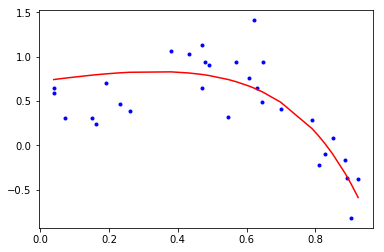

In [384]:
plt.figure()
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,y_manual_intercept_included_predict,color="red")

In [385]:
y_manual_test_predict=polynomial_predict(xtest,manual_coef,intercept=True)

In [386]:
print("Train RSS: {}\nTest RSS: {}".format(rss(yseries,y_manual_predict),
                                          rss(ytest,y_manual_test_predict)))

Train RSS: 2.71015640793861
Test RSS: 2.20088813796404
